# Расчёты метрик для E-commerce


Вы получили набор данных (файл data.xlsx), в котором содержатся данные по различным категориям (лист категории) и по брендам (лист бренды). 

# Загрузка библиотек

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

## Задание 1. Подготовка данных к работе

1) Сформируйте два датафрейма: один с данными по категориям, другой по брендам. Выгрузите данные из файла в Excel формате, приложенного к заданию

In [27]:
#данные по категориям
df_category = pd.read_excel('data_category.xlsx')
df_category.head()

,date,cat1_name,cat2_name,cat3_name,cat4_name,cat5_name,cat_id,total_products,total_products_available,total_reviews_period,total_rate_period,total_sales_period,total_gmv_period,total_w_price_period
0,2021-01,Техника для кухни,Крупная техника для кухни,Стиральные машины,NaN,NaN,267,717,569,699,4.72,10520.0,261594096.0,33471.34
1,2021-01,Техника для кухни,Встраиваемая техника,Духовые шкафы,Электрические духовые шкафы,NaN,354,936,736,179,4.74,3282.0,88321816.0,32048.29
2,2021-01,Техника для кухни,Встраиваемая техника,Встраиваемые посудомоечные машины,NaN,NaN,356,243,193,106,4.81,1847.0,65940492.0,38215.91
3,2021-01,Техника для кухни,Приготовление кофе,Кофемашины,NaN,NaN,404,150,141,145,4.78,1981.0,78239992.0,53331.06
4,2021-01,Техника для кухни,Крупная техника для кухни,Холодильники,NaN,NaN,338,1367,1088,498,4.73,6010.0,209767472.0,45644.74


In [28]:
#данные по брендам
df_brand = pd.read_excel('data_brand.xlsx')
df_brand.head()

,date,cat_id,brand_id,brand_name,brand_products,brand_products_available,brand_reviews_period,brand_rate_period,brand_sales_period,brand_gmv_period,brand_w_price_period
0,2021-01,267,16,LG,70,51,182,4.85,3561.0,104788056.0,47157.23
1,2021-01,354,406,Bosch,111,72,32,4.81,1259.0,41604080.0,39593.08
2,2021-01,356,406,Bosch,51,45,46,4.78,961.0,37822576.0,46877.65
3,2021-01,404,427,DeLonghi,39,36,34,4.76,835.0,36979552.0,53206.48
4,2021-01,338,16,LG,76,59,65,4.75,791.0,36394492.0,63102.21


2) Из датафрейма Категории необходимо удалить дубликаты. Напишите в текстовом поле ниже количество дубликатов, которое было удалено

In [29]:
#посмотрим на дубликаты 
df_category[df_category.duplicated()].head()

,date,cat1_name,cat2_name,cat3_name,cat4_name,cat5_name,cat_id,total_products,total_products_available,total_reviews_period,total_rate_period,total_sales_period,total_gmv_period,total_w_price_period
5,2021-01,Техника для кухни,Крупная техника для кухни,Холодильники,NaN,NaN,338,1367,1088,498,4.73,6010.0,209767472.0,45644.74
6,2021-01,Техника для кухни,Крупная техника для кухни,Холодильники,NaN,NaN,338,1367,1088,498,4.73,6010.0,209767472.0,45644.74
7,2021-01,Техника для кухни,Крупная техника для кухни,Стиральные машины,NaN,NaN,267,717,569,699,4.72,10520.0,261594096.0,33471.34
8,2021-01,Техника для кухни,Крупная техника для кухни,Холодильники,NaN,NaN,338,1367,1088,498,4.73,6010.0,209767472.0,45644.74
9,2021-01,Техника для кухни,Крупная техника для кухни,Стиральные машины,NaN,NaN,267,717,569,699,4.72,10520.0,261594096.0,33471.34


In [30]:
df_category.duplicated().value_counts()

True     9100
False     415
dtype: int64

In [31]:
#тут лучше оставить первую строку, а остальные удалить. Перезапишем дата-фрейм без дубликатов
df_category = df_category.drop_duplicates(keep='first')

Ответ: удалили 9100 дубликатов

-------------------------------------------

3) Сколько пропусков содержится в обоих датафреймах? Заполните все пропущенные значения нулями

In [32]:
#629 в дата-фрейме по категориям 
df_category.isna().sum().sum()

629

In [33]:
#17788 в дата-фрейме по брендам
df_brand.isna().sum().sum()

17788

In [34]:
#заполняем пропущенные: 
df_category = df_category.fillna(0)
df_category

,date,cat1_name,cat2_name,cat3_name,cat4_name,cat5_name,cat_id,total_products,total_products_available,total_reviews_period,total_rate_period,total_sales_period,total_gmv_period,total_w_price_period
0,2021-01,Техника для кухни,Крупная техника для кухни,Стиральные машины,0,0,267,717,569,699,4.72,10520.0,261594096.0,33471.34
1,2021-01,Техника для кухни,Встраиваемая техника,Духовые шкафы,Электрические духовые шкафы,0,354,936,736,179,4.74,3282.0,88321816.0,32048.29
2,2021-01,Техника для кухни,Встраиваемая техника,Встраиваемые посудомоечные машины,0,0,356,243,193,106,4.81,1847.0,65940492.0,38215.91
3,2021-01,Техника для кухни,Приготовление кофе,Кофемашины,0,0,404,150,141,145,4.78,1981.0,78239992.0,53331.06
4,2021-01,Техника для кухни,Крупная техника для кухни,Холодильники,0,0,338,1367,1088,498,4.73,6010.0,209767472.0,45644.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,2021-05,Техника для кухни,Товары для кухни,Посуда,Посуда для сервировки стола,0,433,113,94,4,5.00,67.0,22009.5,562.40
8549,2021-05,Техника для кухни,Товары для кухни,Кухонные принадлежности,"Подставки под горячее, прихватки",0,426,67,59,1,5.00,26.0,7889.0,365.62
8662,2021-05,Техника для кухни,Товары для кухни,Кухонные принадлежности,Прочие товары для кухни,0,440,46,35,1,5.00,68.0,1825.0,30.83
8747,2021-05,Техника для кухни,Мелкая техника для кухни,Прочая кухонная техника,Прочее,0,402,51,41,2,5.00,0.0,0.0,0.00


In [35]:
df_brand.fillna(0)

,date,cat_id,brand_id,brand_name,brand_products,brand_products_available,brand_reviews_period,brand_rate_period,brand_sales_period,brand_gmv_period,brand_w_price_period
0,2021-01,267,16,LG,70,51,182,4.85,3561.0,104788056.0,47157.23
1,2021-01,354,406,Bosch,111,72,32,4.81,1259.0,41604080.0,39593.08
2,2021-01,356,406,Bosch,51,45,46,4.78,961.0,37822576.0,46877.65
3,2021-01,404,427,DeLonghi,39,36,34,4.76,835.0,36979552.0,53206.48
4,2021-01,338,16,LG,76,59,65,4.75,791.0,36394492.0,63102.21
...,...,...,...,...,...,...,...,...,...,...,...
9510,2021-05,432,2708,Мечта,16,16,0,0.00,0.0,0.0,0.00
9511,2021-05,383,626,Bomann,1,1,0,0.00,0.0,0.0,0.00
9512,2021-05,427,993,ПОЛИМЕРБЫТ,1,1,0,0.00,0.0,0.0,0.00
9513,2021-05,396,2092,ВЕЛИКИЕ-РЕКИ,1,1,0,0.00,0.0,0.0,0.00


4) Сохраните полученные датафреймы в отдельные файлы в Excel формате

In [36]:
df_category.to_excel('data_categories.xlsx', sheet_name='categories', index=False)

In [37]:
df_brand.to_excel('data_brands.xlsx', sheet_name='brands', index=False)

-------------------------------------------

## Задание 2. Работа с категориями

1) Найдите категорию с самым большим изменением средней цены за период (с января по май)

In [38]:
#переформатируем дату
df_category ['date'] = pd.to_datetime(df_category['date'])

In [39]:
df_mean = df_category.groupby(['date','cat3_name'], as_index = False).agg({'total_w_price_period':'mean'})

In [40]:
a = df_mean[df_mean['date'].dt.month == 1]
b = df_mean[df_mean['date'].dt.month == 5]

In [41]:
c = a.merge(b, on = 'cat3_name', how = 'left')
c.head()

,date_x,cat3_name,total_w_price_period_x,date_y,total_w_price_period_y
0,2021-01-01,Аксессуары для кофеварок и кофемашин,743.960000,2021-05-01,693.860000
1,2021-01-01,Блендеры,5397.350000,2021-05-01,4175.720000
2,2021-01-01,Вакуумные упаковщики и су-вид,6658.460000,2021-05-01,3149.640000
3,2021-01-01,Варочные панели,22331.853333,2021-05-01,19691.666667
4,2021-01-01,Вафельницы,2997.130000,2021-05-01,2555.000000


In [42]:
#посчитаем разницы между средними в абсолютных и процентных значениях
c = c.rename(columns={"total_w_price_period_x": "mean_jan", "total_w_price_period_y": "mean_may" })
c['mean_delta'] = c.mean_jan - c.mean_may
c['mean_delta_%'] = (c.mean_jan - c.mean_may) / c.mean_jan * 100

In [43]:
#так как нам важна именно величина разницы, то сортируем по модулю 
c.sort_values(by='mean_delta_%', key=abs, ascending = False).head()

,date_x,cat3_name,mean_jan,date_y,mean_may,mean_delta,mean_delta_%
2,2021-01-01,Вакуумные упаковщики и су-вид,6658.46,2021-05-01,3149.64,3508.82,52.697170
33,2021-01-01,Прочая встраиваемая техника,149590.00,2021-05-01,90135.00,59455.00,39.745304
5,2021-01-01,Вспениватели молока,3382.00,2021-05-01,4627.85,-1245.85,-36.837670
39,2021-01-01,Тостеры и сэндвич-тостеры,2067.04,2021-05-01,2662.45,-595.41,-28.804958
1,2021-01-01,Блендеры,5397.35,2021-05-01,4175.72,1221.63,22.633885


Ответ: Категория с самым большим изменением средней цены - Вакуумные упаковщики и су-вид (в процентном соотношении), 
В абсолютных значениях будет - Прочая встраиваемая техника.

------------------------------

2) Найдите категорию с наименьшим количеством доступных для покупки товаров

In [44]:
#ответ: Измельчители пищевых отходов
df_category.groupby('cat3_name', as_index = False).agg({'total_products_available':'sum'})\
                                                  .sort_values(by='total_products_available').head(1)

,cat3_name,total_products_available
14,Измельчители пищевых отходов,106


3,4) Найдите категорию с наибольшим приростом оборота за период в % соотношении и в абсолютном значении.

In [45]:
df_gmv = df_category.groupby(['date','cat3_name'], as_index = False).agg({'total_gmv_period':'sum'})
df_gmv.head()

,date,cat3_name,total_gmv_period
0,2021-01-01,Аксессуары для кофеварок и кофемашин,1021458.75
1,2021-01-01,Блендеры,13424004.00
2,2021-01-01,Вакуумные упаковщики и су-вид,1504654.60
3,2021-01-01,Варочные панели,68398612.00
4,2021-01-01,Вафельницы,2809423.00


In [46]:
d = df_gmv[df_gmv['date'].dt.month == 1]
e = df_gmv[df_gmv['date'].dt.month == 5]

In [47]:
f = d.merge(e, on = 'cat3_name', how = 'left')
f.head()

,date_x,cat3_name,total_gmv_period_x,date_y,total_gmv_period_y
0,2021-01-01,Аксессуары для кофеварок и кофемашин,1021458.75,2021-05-01,715460.0
1,2021-01-01,Блендеры,13424004.00,2021-05-01,16970514.0
2,2021-01-01,Вакуумные упаковщики и су-вид,1504654.60,2021-05-01,1238420.0
3,2021-01-01,Варочные панели,68398612.00,2021-05-01,57011700.0
4,2021-01-01,Вафельницы,2809423.00,2021-05-01,2058194.9


In [48]:
#посчитаем разницы между оборотами в абсолютных и процентных значениях
f = f.rename(columns={"total_gmv_period_x": "gmv_jan", "total_gmv_period_y": "gmv_may" })
f['gmv_delta'] = f.gmv_jan - f.gmv_may
f['gmv_delta_%'] = (f.gmv_jan - f.gmv_may) / f.gmv_jan * 100

In [49]:
#категория с наибольшим приростом оборота за период (в % соотношении) - Измельчители пищевых отходов
f.sort_values(by='gmv_delta_%', ascending = False).head(1)

,date_x,cat3_name,gmv_jan,date_y,gmv_may,gmv_delta,gmv_delta_%
14,2021-01-01,Измельчители пищевых отходов,638320.0,2021-05-01,207920.0,430400.0,67.426996


In [50]:
#категория с наибольшим приростом оборота за период (в абсолютном значении) - Стиральные машины
f.sort_values(by='gmv_delta', ascending = False).head(1)

,date_x,cat3_name,gmv_jan,date_y,gmv_may,gmv_delta,gmv_delta_%
36,2021-01-01,Стиральные машины,261594096.0,2021-05-01,213338272.0,48255824.0,18.446832


5) Создайте столбец gmv_grow, в котором будет отражен прирост оборота от месяца к месяцу

In [51]:
df_category_grow = df_category.groupby('date', as_index = False).agg({'total_gmv_period':'sum'})
df_category_grow 

,date,total_gmv_period
0,2021-01-01,1.144743e+09
1,2021-02-01,1.172207e+09
2,2021-03-01,1.546066e+09
3,2021-04-01,1.206335e+09
4,2021-05-01,1.003657e+09


In [52]:
growth_rate = np.exp(np.diff(np.log(df_category_grow.total_gmv_period))) - 1

In [53]:
growth_rate

array([ 0.02399171,  0.31893567, -0.21973936, -0.16801082])

In [54]:
df_category_grow ['gmv_grow'] = [0 , 0.02399171,  0.31893567, -0.21973936, -0.16801082 ]

In [55]:
df_category_grow 

,date,total_gmv_period,gmv_grow
0,2021-01-01,1.144743e+09,0.000000
1,2021-02-01,1.172207e+09,0.023992
2,2021-03-01,1.546066e+09,0.318936
3,2021-04-01,1.206335e+09,-0.219739
4,2021-05-01,1.003657e+09,-0.168011


6) Сгенерируйте график, демонстрирующий оборот от месяца к месяцу в трех самых крупных категориях

Так как тут у нас не прирост оборота, а оборот от месяца к месяцу, если я правильно поняла, то тут задача показать кумулятивный оборот.

In [56]:
#ищем три самые большие категории
df_category.groupby('cat3_name').agg({'total_gmv_period':'sum'})\
                                 .sort_values(by='total_gmv_period', ascending = False).head(3)

,total_gmv_period
cat3_name,
Стиральные машины,1.192384e+09
Холодильники,1.187613e+09
Духовые шкафы,5.113021e+08


In [57]:
#считаем оборот к о месяца к месяцу для стиральных машин 
df_wash = df_category.query('cat3_name == "Стиральные машины"')\
            .groupby('date', as_index = False).agg({'total_gmv_period':'sum'})
df_wash ['gmv_growth'] = df_wash ['total_gmv_period'].cumsum()
df_wash

,date,total_gmv_period,gmv_growth
0,2021-01-01,261594096.0,2.615941e+08
1,2021-02-01,208866464.0,4.704606e+08
2,2021-03-01,258854672.0,7.293152e+08
3,2021-04-01,249730400.0,9.790456e+08
4,2021-05-01,213338272.0,1.192384e+09


In [58]:
#считаем оборот от месяца к месяцу для холодильников 
df_ref = df_category.query('cat3_name == "Холодильники"')\
            .groupby('date', as_index = False).agg({'total_gmv_period':'sum'})
df_ref ['gmv_growth'] = df_ref ['total_gmv_period'].cumsum()
df_ref

,date,total_gmv_period,gmv_growth
0,2021-01-01,209767472.0,2.097675e+08
1,2021-02-01,247472784.0,4.572403e+08
2,2021-03-01,254155440.0,7.113957e+08
3,2021-04-01,231125328.0,9.425210e+08
4,2021-05-01,245092320.0,1.187613e+09


In [59]:
#считаем оборот от месяца к месяцу для духовок 
df_oven = df_category.query('cat3_name == "Духовые шкафы"')\
            .groupby('date', as_index = False).agg({'total_gmv_period':'sum'})
df_oven ['gmv_growth'] = df_oven['total_gmv_period'].cumsum()
df_oven

,date,total_gmv_period,gmv_growth
0,2021-01-01,90151226.0,90151226.0
1,2021-02-01,86370750.0,176521976.0
2,2021-03-01,159194796.8,335716772.8
3,2021-04-01,110324622.2,446041395.0
4,2021-05-01,65260680.4,511302075.4


In [60]:
#соединяем 
df_vis = df_wash.merge(df_ref, on = 'date', how = 'left')
df_vis = df_vis.merge(df_oven, on = 'date', how = 'left')

In [61]:
df_vis = df_vis.rename(columns={"gmv_growth_x": "Washing_machines", "gmv_growth_y": "Refrigerators","gmv_growth": "Ovens"})

In [62]:
df_vis = df_vis.drop(columns = ['total_gmv_period_x', 'total_gmv_period_y', 'total_gmv_period'])

In [63]:
df_vis = df_vis.melt(id_vars='date')

In [64]:
df_vis

,date,variable,value
0,2021-01-01,Washing_machines,2.615941e+08
1,2021-02-01,Washing_machines,4.704606e+08
2,2021-03-01,Washing_machines,7.293152e+08
3,2021-04-01,Washing_machines,9.790456e+08
4,2021-05-01,Washing_machines,1.192384e+09
5,2021-01-01,Refrigerators,2.097675e+08
6,2021-02-01,Refrigerators,4.572403e+08
7,2021-03-01,Refrigerators,7.113957e+08
8,2021-04-01,Refrigerators,9.425210e+08
9,2021-05-01,Refrigerators,1.187613e+09


<AxesSubplot:xlabel='date', ylabel='value'>

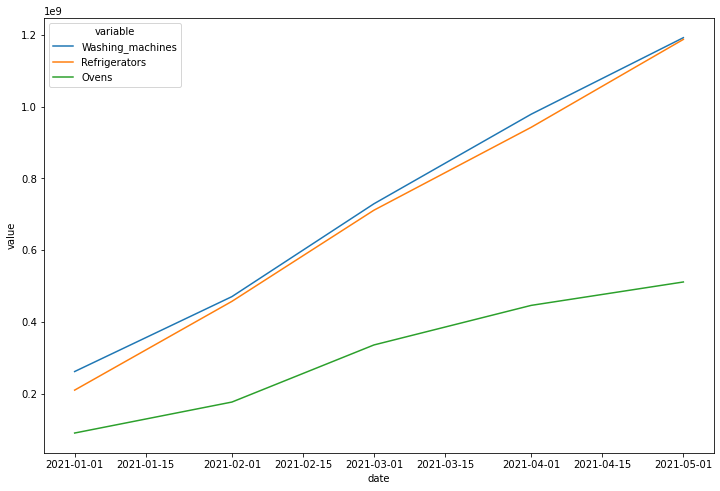

In [65]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_vis, x="date", y="value", hue = 'variable')

7)* Сгенерируйте график, показывающий распредление оборота между различными подкатегориями

In [66]:
df_gwv_cater = df_category.query('cat4_name != 0').groupby('cat4_name', as_index = False)\
                            .agg({'total_gmv_period':'sum'}).sort_values(by='total_gmv_period', ascending = False)

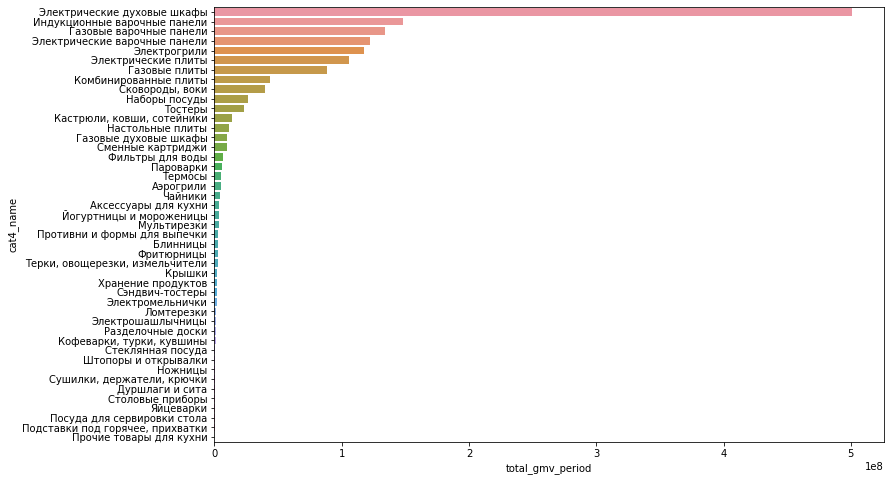

In [67]:
plt.figure(figsize=(12, 8))
sns.barplot(data = df_gwv_cater.query('total_gmv_period > 0'), x = 'total_gmv_period', y ='cat4_name')
plt.show()

## Задание 3. Работа с брендами


1) Сгенерируйте таблицу с суммарным оборотом брендов во всех категрориях за апрель. Она должна содержать бренд, id бренда и оборот за данный период

In [69]:
#Для полноты картины соединим категории с брендами 
#(я это делала по cat_id)
df_all = df_brand.merge(df_category, on = 'cat_id', how = 'inner')

In [70]:
df_brands_gmv = df_all.query('date_x == "2021-04"').groupby(['brand_name','brand_id'], as_index = False)\
                        .agg({'brand_gmv_period':'sum'}) 
df_brands_gmv

,brand_name,brand_id,brand_gmv_period
0,ABC,851,0.0
1,AEG,304,99950.0
2,AEL,824,287750.0
3,AGU-BABY,2313,0.0
4,AQUA-WORK,2205,52150.0
...,...,...,...
308,Осз,1724,0.0
309,ПОЛИМЕРБЫТ,993,3490.0
310,Саратов,873,46428132.5
311,Славда,548,4143750.0


2) Выведите среднюю цену у каждого бренда вне зависимости от периода и категории

In [71]:
df_price_avg = df_all.groupby('brand_name', as_index = False).agg({'brand_w_price_period':'mean'})
df_price_avg

,brand_name,brand_w_price_period
0,ABC,5471.250000
1,AEG,19990.000000
2,AEL,7102.262000
3,AGU-BABY,11490.000000
4,AQUA-WORK,4398.890000
...,...,...
316,Осз,166.333333
317,ПОЛИМЕРБЫТ,349.000000
318,Саратов,14995.416000
319,Славда,5732.098000


3) Назовите топ-5 брендов по приросту оборота с января по май 2021 года

In [72]:
top_5_gmv = df_brand.groupby(['brand_name','date'], as_index = False)\
                        .agg({'brand_gmv_period':'sum'})

In [73]:
top_5_gmv = top_5_gmv.pivot(index='brand_name', columns='date', values='brand_gmv_period')

In [74]:
top_5_gmv ['brand_gmv_period'] = (top_5_gmv['2021-02'] - top_5_gmv['2021-01'])+\
                                (top_5_gmv['2021-03'] - top_5_gmv['2021-02'])+\
                                (top_5_gmv['2021-04'] - top_5_gmv['2021-03'])+\
                                (top_5_gmv['2021-05'] - top_5_gmv['2021-04'])

In [75]:
top_5_gmv.sort_values('brand_gmv_period', ascending = False).head(5)

date,2021-01,2021-02,2021-03,2021-04,2021-05,brand_gmv_period
brand_name,,,,,,
Hi,6291078.08,9292784.01,40105194.21,36178056.65,3.996073e+07,3.366965e+07
Haier,60396872.49,50979091.80,76750188.78,81579172.38,8.352040e+07,2.312353e+07
Whirlpool,13183083.50,15529293.13,39062716.10,26794607.79,2.345832e+07,1.027524e+07
Maunfeld,6732367.83,8654481.20,9755382.43,11272786.48,1.279806e+07,6.065688e+06
Hotpoint-Ariston,39241634.61,46400399.53,67573139.54,48546064.96,4.358200e+07,4.340368e+06


4) Какие бренды обладают наибольшим количеством доступных для покупки товаров за весну 2021 года?

In [76]:
df_brand.query('date == "2021-03" or date == "2021-04" or date == "2021-05"').groupby('brand_name')\
                .agg({'brand_products_available':'sum'}).sort_values('brand_products_available', ascending = False).head(5)

,brand_products_available
brand_name,
Maunfeld,2110
Mayer&Boch,1713
REGENT-INOX,1683
Bosch,1663
Sistema,1652


5) Какие факторы влияют на количество отзывов у бренда в категории?

In [77]:
#Возьмём категорию "Чайники электрические" и релевентные показатели
df_rate = df_brand.query('cat_id == 380').groupby('brand_name')\
        .agg({'brand_reviews_period':'sum','brand_products_available':'mean','brand_rate_period':'mean',\
              'brand_w_price_period':'mean','brand_sales_period':'sum'})

In [78]:
df_rate = df_rate.fillna(0)

Так как нам нужно узнать отношение колличественной независимой переменной с зависимыми, то оптимальным методом нахождения влияния будет линейная регрессия

In [79]:
#так как brand_rate_period имеет самое маленькое влияние, то эту переменную можно попробовать исключить 
import statsmodels.api as sm
import statsmodels.formula.api as smf 

results = smf.ols('brand_reviews_period ~ brand_products_available + brand_rate_period + brand_w_price_period + brand_sales_period', df_rate).fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     brand_reviews_period   R-squared:                       0.882
Model:                              OLS   Adj. R-squared:                  0.875
Method:                   Least Squares   F-statistic:                     119.7
Date:                  Thu, 24 Nov 2022   Prob (F-statistic):           5.66e-29
Time:                          14:33:50   Log-Likelihood:                -384.07
No. Observations:                    69   AIC:                             778.1
Df Residuals:                        64   BIC:                             789.3
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Inte

In [80]:
#мы повысили R**2 и увеличили предсказани способность модели до 88%
import statsmodels.api as sm
import statsmodels.formula.api as smf 

results = smf.ols('brand_reviews_period ~ brand_products_available + brand_sales_period + brand_w_price_period', df_rate).fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     brand_reviews_period   R-squared:                       0.881
Model:                              OLS   Adj. R-squared:                  0.875
Method:                   Least Squares   F-statistic:                     160.1
Date:                  Thu, 24 Nov 2022   Prob (F-statistic):           5.83e-30
Time:                          14:33:50   Log-Likelihood:                -384.45
No. Observations:                    69   AIC:                             776.9
Df Residuals:                        65   BIC:                             785.8
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Inte

Ответ: наиболее сильно в категории Чайников влияют (ожидаемо) количество доступных продуктов, коичество продаж и чуть меньше влияет цена продукта.

----------------------------------------------------

6)* Создайте словарь, в котором содержатся все категории, в которых был встречен данный бренд (ключом является название бренда)

In [81]:
df_brands_voc = df_all[['brand_name', 'cat3_name']]

In [82]:
df_brands_voc = df_brands_voc.drop_duplicates(keep='first')

In [83]:
df_dummies = pd.get_dummies(df_brands_voc['cat3_name'], drop_first = True)

In [84]:
df_dummies ['brand_name'] = df_brands_voc ['brand_name']

In [85]:
df_brands_voc = df_dummies.melt(id_vars = 'brand_name' , var_name = 'categories')

In [86]:
df_brands_voc = df_brands_voc.query('value == 1').groupby('brand_name').categories.apply(list)

In [87]:
df_brands_voc = df_brands_voc.to_frame()

In [88]:
#сделала в итоге дата-фрейм, мне кажется он удобнее будет :) 
df_brands_voc

,categories
brand_name,
ABC,[Кулеры для воды]
AEG,[Микроволновые печи]
AEL,[Кулеры для воды]
AGU-BABY,[Прочая кухонная техника]
AQUA-WORK,[Кулеры для воды]
...,...
Осз,[Посуда]
ПОЛИМЕРБЫТ,"[Кухонные принадлежности, Посуда]"
Саратов,"[Морозильники, Холодильники]"


## Задание 4. Создание отчета 

Выберите любой бренд и создайте небольшой отчет по основным показателям за период с января по май 2021 года. Какие показатели Вы включите в анализ? Какие метрики выведете, чтобы сделать вывод об успешности стратегии данного бренда на маркетплейсе? Включите в анализ сравнение бренда с конкурентами, создайте графики, которые помогут лучше понять место бренда на полке, по возможности пропишите рекомендации

Oтчет по основным показателям бренда LD за период с января по май 2021 года

In [89]:
df_lg = df_all.query('brand_name == "LG"')

In [90]:
#удалим колонки, которые точно не нужны
df_lg = df_lg.drop(columns = ['brand_id','date_y','cat1_name'])

In [91]:
df_lg_cat = df_lg.groupby('cat3_name', as_index = False)\
            .agg({'brand_sales_period':'sum', 'brand_gmv_period':'sum'})\
            .sort_values('brand_gmv_period',ascending = False)

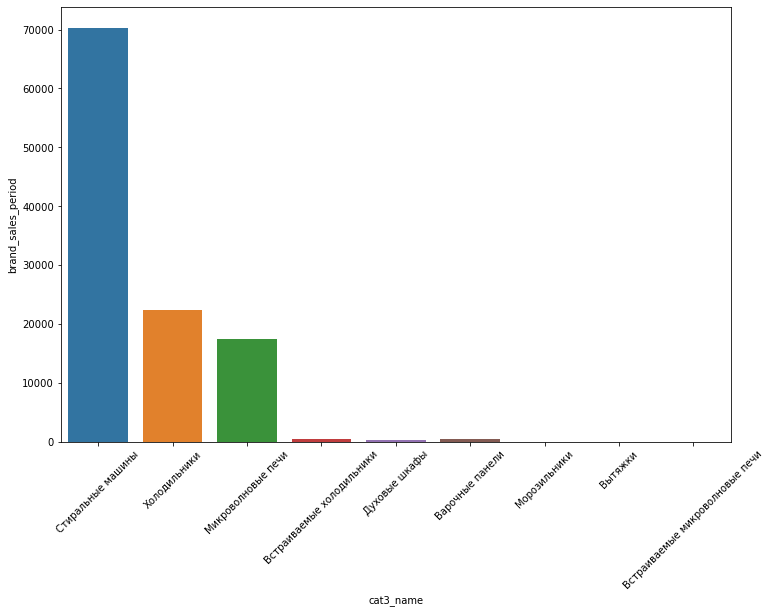

In [92]:
#посмотрим на распределение продаж с маркетплейсов по категориям 
plt.figure(figsize=(12, 8))
sns.barplot(data = df_lg_cat, x = 'cat3_name', y ='brand_sales_period')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='brand_rate_period', ylabel='cat3_name'>

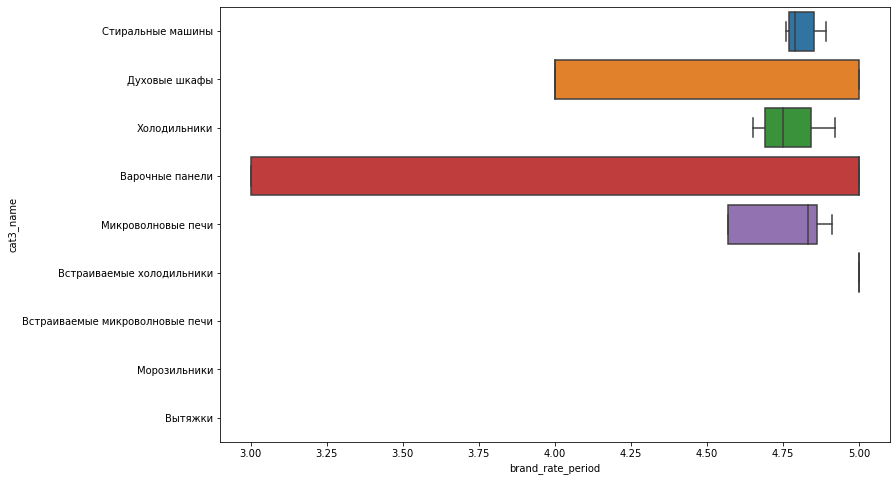

In [93]:
#посмотрим на оценки с маркетплейсов по категориям 
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_lg, x="brand_rate_period",  y="cat3_name")

In [94]:
#посмотрим ещё на средние
df_lg.groupby('cat3_name', as_index = False)\
            .agg({'brand_rate_period':'mean'})

,cat3_name,brand_rate_period
0,Варочные панели,4.333333
1,Встраиваемые микроволновые печи,NaN
2,Встраиваемые холодильники,5.000000
3,Вытяжки,NaN
4,Духовые шкафы,4.333333
5,Микроволновые печи,4.748000
6,Морозильники,NaN
7,Стиральные машины,4.812000
8,Холодильники,4.770000


In [95]:
gmv_by_date = df_lg.groupby('date_x', as_index = False).agg({'brand_gmv_period':'sum'})

In [96]:
growth_rate = np.exp(np.diff(np.log(gmv_by_date.brand_gmv_period))) - 1 
growth_rate

array([-0.2120575 ,  0.16719492, -0.02914172, -0.12406256])

In [97]:
gmv_by_date ['grow'] = [0 , -0.2120575 ,  0.16719492, -0.02914172, -0.12406256]

In [98]:
#показатели прироста не очень хорошие
gmv_by_date

,date_x,brand_gmv_period,grow
0,2021-01,754515965.0,0.000000
1,2021-02,594515197.0,-0.212058
2,2021-03,693915115.0,0.167195
3,2021-04,673693235.0,-0.029142
4,2021-05,590113128.0,-0.124063


In [99]:
#посчитаем показатель прироста у всех
gmv_all = df_all.groupby('date_x', as_index = False).agg({'brand_gmv_period':'sum'})
growth_rate = np.exp(np.diff(np.log(gmv_all.brand_gmv_period))) - 1
growth_rate

array([ 0.02399163,  0.31893594, -0.21974002, -0.16801032])

In [100]:
gmv_all ['grow_all'] = [0, 0.02399163,  0.31893594, -0.21974002, -0.16801032 ]

In [101]:
gmv = gmv_by_date.merge(gmv_all, on = 'date_x', how = 'left')

In [102]:
#и ещё посчитаем долю оборота LG по рынку
gmv ['lg_share_gmv'] = gmv.brand_gmv_period_x/gmv.brand_gmv_period_y

In [103]:
gmv = gmv.rename(columns={"brand_gmv_period_x": "LG_gmv", "grow": "LG_grow",\
                         "brand_gmv_period_y": "all_gmv", "grow_all": "all_grow"})

In [104]:
#но в мае и апреле у всех брендов был спад,плюс у нас довольно большая доля оборота по рынку
gmv

,date_x,LG_gmv,LG_grow,all_gmv,all_grow,lg_share_gmv
0,2021-01,754515965.0,0.000000,5.723710e+09,0.000000,0.131823
1,2021-02,594515197.0,-0.212058,5.861031e+09,0.023992,0.101435
2,2021-03,693915115.0,0.167195,7.730325e+09,0.318936,0.089765
3,2021-04,673693235.0,-0.029142,6.031663e+09,-0.219740,0.111693
4,2021-05,590113128.0,-0.124063,5.018281e+09,-0.168010,0.117593


In [105]:
#посмотрим на наших конкурентов (схожих по обороту и продажам)
df_all.groupby('brand_name', as_index = False)\
            .agg({'brand_sales_period':'sum', 'brand_gmv_period':'sum'})\
            .sort_values('brand_gmv_period',ascending = False).head(5)

,brand_name,brand_sales_period,brand_gmv_period
33,Bosch,165240.0,4.030973e+09
143,LG,111500.0,3.306753e+09
229,Samsung,95000.0,2.632521e+09
97,Haier,62305.0,1.766129e+09
118,Indesit,84545.0,1.540810e+09


In [106]:
df_LG_others = df_all.query('brand_name == "Bosch" or brand_name ==  "LG" or brand_name == "Samsung" or brand_name ==  "Haier" or brand_name ==  "Indesit"')

In [107]:
#подготовим таблицу, чтобы посомтреть динамику отзывов по брендам 
df_reviews = df_LG_others.groupby(['date_x', 'brand_name'], as_index = False)\
            .agg({'brand_reviews_period':'sum'})
df_reviews

,date_x,brand_name,brand_reviews_period
0,2021-01,Bosch,1920
1,2021-01,Haier,1980
2,2021-01,Indesit,700
3,2021-01,LG,1420
4,2021-01,Samsung,1005
5,2021-02,Bosch,1180
6,2021-02,Haier,1560
7,2021-02,Indesit,725
8,2021-02,LG,1465
9,2021-02,Samsung,1070


<AxesSubplot:xlabel='date_x', ylabel='brand_reviews_period'>

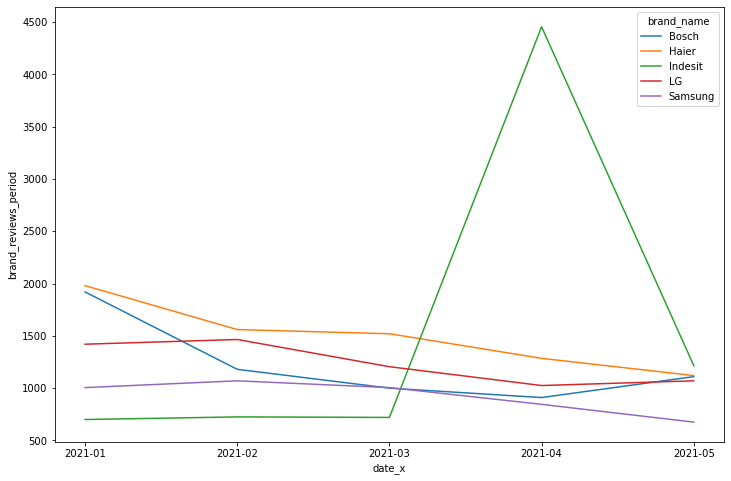

In [108]:
#тут тоже есть путь для роста и конкуренты, которые поняли резко поняи важность отзывов 
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_reviews, x="date_x", y="brand_reviews_period", hue = 'brand_name')

In [109]:
#посмотрим на средние оценки по крупным категориям 
df_rate = df_LG_others.query('cat2_name == "Встраиваемая техника" or cat2_name == "Крупная техника для кухни" or \
                        cat2_name == "Приготовление пищи"')\
                        .groupby(['brand_name', 'cat2_name'], as_index = False)\
                        .agg({'brand_rate_period':'mean'})
df_rate

,brand_name,cat2_name,brand_rate_period
0,Bosch,Встраиваемая техника,4.475758
1,Bosch,Крупная техника для кухни,4.694815
2,Bosch,Приготовление пищи,4.841538
3,Haier,Встраиваемая техника,4.485000
4,Haier,Крупная техника для кухни,4.721667
5,Haier,Приготовление пищи,4.594286
6,Indesit,Встраиваемая техника,4.845000
7,Indesit,Крупная техника для кухни,4.775429
8,LG,Встраиваемая техника,4.428571
9,LG,Крупная техника для кухни,4.791000


<AxesSubplot:xlabel='brand_name', ylabel='brand_rate_period'>

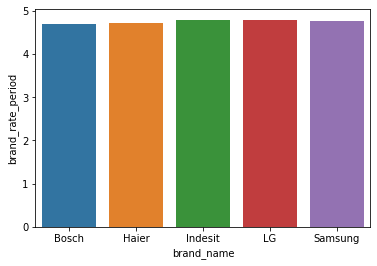

In [110]:
#в этой категории всё хорошо
sns.barplot(data = df_rate.query('cat2_name == "Крупная техника для кухни"'), x = 'brand_name', y ='brand_rate_period')

<AxesSubplot:xlabel='brand_name', ylabel='brand_rate_period'>

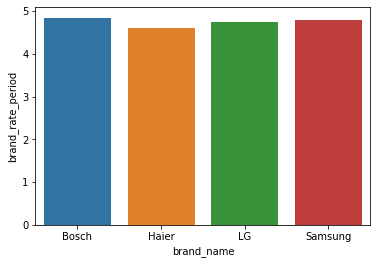

In [111]:
#и в этой категории всё хорошо
sns.barplot(data = df_rate.query('cat2_name == "Приготовление пищи"'), x = 'brand_name', y ='brand_rate_period')

<AxesSubplot:xlabel='brand_name', ylabel='brand_rate_period'>

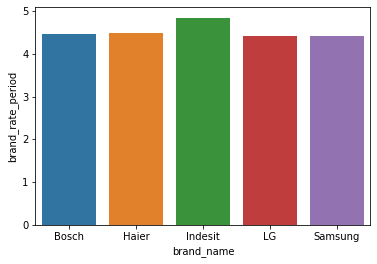

In [112]:
#в принципе неплохо, но по сравнению с нашими показателями в других катгориях - немного проседает 
sns.barplot(data = df_rate.query('cat2_name == "Встраиваемая техника"'), x = 'brand_name', y ='brand_rate_period')

Выводы: на маркетплейсах у нас чаще покупают крупногабаритную технику для дома - стиральные машины и холодильники. Высокие оценки нам ставят за стиральные машины, холодильники и микроволновые печи (средняя по оценкам больше 4,75 пунктов из 5).


У нас довольно большая доля оборота в целом по рынку на маркетплейсах. Но в феврале, апреле и мае 2021 года у LG был спад (на 21, 3 и 12 процентов). В апреле и мае спад был у всех, тем не менее в феврале наш оборот падал уже не из-за общей динамики.


Нам также нужно как-то поощрять количество отзывов от клиентов. На май 2021 года мы только на 4 месте по этому показателю, плюс есть снижение колличества отзывов. Также, можно улучшить оценки по категории встраиваемой техники. Важно помнить: чем больше отзывов у товара на маркетплейсе и выше его рейтинг, тем выше товар в поиске и больше вероятность, что его купят.